# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

  ###  $y'(x) = 3x^{2}ln(x)+x^{2}$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def dy(x):
    return 3*x*x*np.log(x)+x*x


In [3]:
print(f"В точке x = {2} функция принимает значение {dy(2)}")

В точке x = 2 функция принимает значение 12.317766166719343


3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [4]:
def get_min_with_gd(w0, func_grad, alpha=0.01, tolerance=0.0001, n_iter=150):
# Реализуем функцию, которая принимат начальное положение и функцию вычисления градиента и находит минимум при помощи метода momentum
    """
    args:
        - w0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - func_grad - градиент функции (питоновская функция, которая принимает на вход координаты и по ним считает градиент)
        - alpha     - leraning rate (шаг обучения)
        - tolerance - критерий остановки (если изменение весов меньше чем это значение)
        - n_iter    - количество итераций в градиентном спуске
    """

    w = np.array(w0)
    history = [w]

    for iter_number in tqdm(range(n_iter)):
        # Вычисляем градиент в текущей точке
        grad = func_grad(w)

        # Итерация градиентного спуска
        w = w - alpha * grad / np.linalg.norm(grad)

        # Сохраняем новые аргументы в историяю
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        # |w(n+1) - w(n)|.mean() < tolerance
        if np.mean(abs(history[-1] - history[-2])) < tolerance:
            break

    return np.array(history)

In [5]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10, dy, alpha=0.001, tolerance=0.0001, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

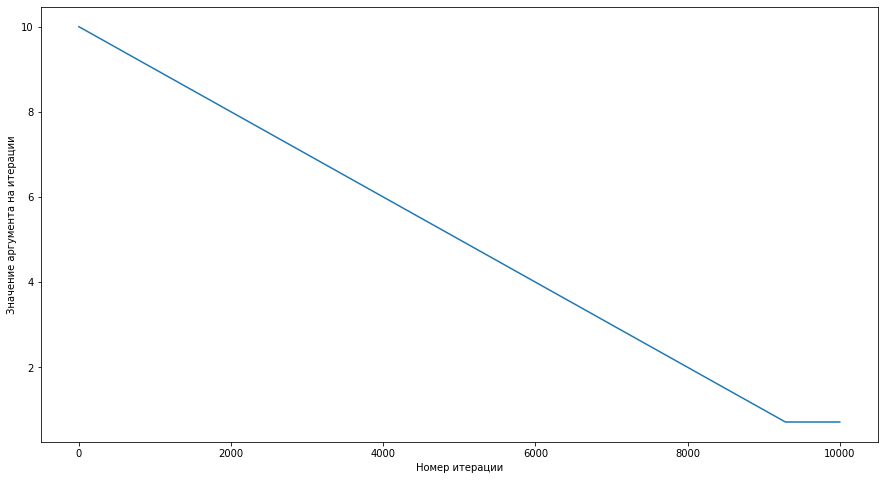

In [6]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$



Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [7]:
def get_min_with_rmsprop(w0, func_grad, alpha=0.01, beta=0.01, gamma=0.01, tolerance=0.0001, n_iter=150):


    w = np.array(w0)
    history = [w]

    for iter_number in tqdm(range(n_iter)):
        
        grad = func_grad(w)
        gamma = (1 - beta) * gamma + beta  * (grad**2)
        w = w - (alpha / (np.sqrt(gamma + 1e-08))) * grad

        history.append(w)

        if np.mean(abs(history[-1] - history[-2])) < tolerance:
            break

    return np.array(history)

In [8]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

history_rmsprop_1 = get_min_with_rmsprop(1, dy, alpha=0.001, tolerance=0.0001, n_iter=10000)
history_rmsprop_2 = get_min_with_rmsprop(5, dy, alpha=0.001, tolerance=0.0001, n_iter=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

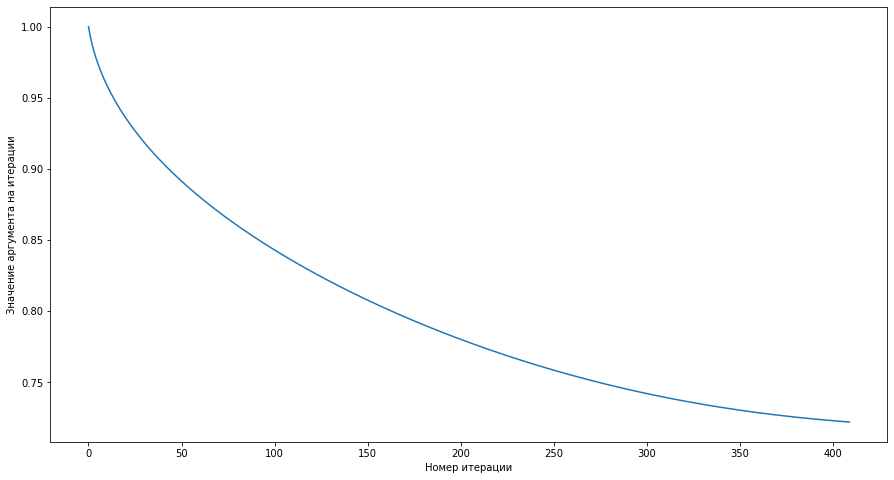

In [9]:
# Ваш код тут
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history_rmsprop_1)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

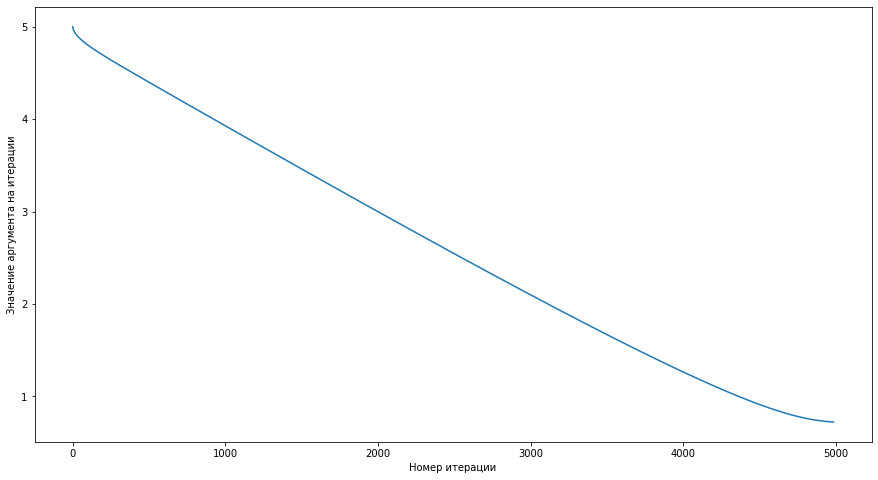

In [10]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history_rmsprop_2)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()